
###0. EXTRA CREDIT
#==========================================#
# - work with a data set (> 5,000 records)



###1. SELECTING AND DOCUMENTING A DATA SET
#==========================================#
##### - link to any documentation about the data that you've found
        # - City of Austin, Texas
        # - https://data.austintexas.gov/City-Government/Final-Report-of-the-Asian-American-Quality-of-Life/hc5t-p62z
##### - discuss the origin of the data (what is it, who collected / generated it, how did the do it, etc)
        # - It is a Census regarding Asian Americans (the fastest-growing minority group in the U.S.) 
        # - It is conducted by Marion Snachez (City of Austin, City Manager's Office, Communications & Public Information Office)
        # - So the surveyors ask questions such as ("What is your age? , What is your ethnic origin?) to people who are documented 
        #as individuals having origins in any of the original peoples of the Far East, Southeast Asia, or the Indian subcontinent
        # - They collected the data by asking questions over the phone and visiting houses
##### - describe why you are interested in it
        # - As a Korean studying in the U.S. and as a person who have immigrants relatives and friends, I have alway interested in
        #the life of Asian / Asian Americans in the U.S. I respect what they have acheived in this foreign country
        #want to know the life of Asian Americans
##### - list a few (2 ~ 3) questions that you think this data set may answer
        # - I want to see relationships between Satisfaction of their quality of Life and 1) Income, 2) Famililarity with American
        #and their 3) proficiency in English
        # - Also it is interesting to ask the relationships between Ethnicity and the formation of Household 
        #( 1) the size of Household, 2) whether they live with Spouse 3) or with Parent 4) or with Friends)

###3.
##### - describe the format of the data in a markdown cell
        # - There are 231 columns So I will briefly go over the sample columns
            # - Ethnicity : an answer for a question "What is your ethnic origin?"
            # - Full Time Employment : an answer for a question "What is your current employment status?"
            # - Income : an answer for a question "How much was your household income?"
            # ... More information in the " Columns in this Dataset " setion in the ULR below
            # https://data.austintexas.gov/City-Government/Final-Report-of-the-Asian-American-Quality-of-Life/hc5t-p62z
        # - determine the likely data type of each fields
            # Most of columns are Boolean (Yes / No) type (but in plain text) (people answer as a plain text e.g.) "Yes I live with spouse")
            # And Some of columns are in Number (Household Size , Income, )
            # Also Some of columns are in degree (plain text) e.g.) your satisfaction of QOL (Pretty Much, Very Much, Not at All ...) )            
            # - Likewise, it is little bit hard to go over all of the columns 
            # and " Columns in this Dataset " section helps to get the answer
            
###4.
##### - Describe the problems that are present in the data and the process you will use to clean / prepare it
        # - They are not problems. They present prevalent in every data sets and they are something that programmers 
        #need to handle
        # But 1) Some of columns are unnecessary or verbose
        # 2) Few of data is emtpy
        # 3) Income data is in range set ($0 - $9999) instead of number

###4.
##### - Export your data
#google spreadsheet link (view permission)
#https://docs.google.com/spreadsheets/d/1rMwN8qM2LYoVlr-dwxnrj-uMoyQ9Agczn1ukcLBE_yg/edit?usp=sharing
    


In [ ]:
#2. ##### - CLEAN OR PREPARE THE DATA
#==========================================#
#DATA SCRUBBING 

###STEP 1: collect ONLY necessary COLUMNs

#column needed for the data analysis is
#COLOUMN NAME | COLUMN NUMBER
#Age   | 2nd
#Gender | 3rd
#Ethnicity | 4th
#Maritial Status | 5th
#Household Size | 7th
#Spouse | 9th
#Parent | 12th
#Friends | 16th
#Religion | 19th
#Full Time Employment | 21th
#Part Time Employment | 22th
#Retired | 29th
#Income | 34th
#US Born | 36th
#Duration of Residency | 37th
#Familiarity with America | 41st
#Language | 77th
#Satisfaction | 79th

import csv
with open('AAQoL.csv') as csvfile:
    reader = csv.reader(csvfile)
    with open('cleanAAQoL.csv','w') as outputfile:
        otp = csv.writer(outputfile)
        for row in reader:
            new_row = row[1:5] + row[6:7] + row[8:9] + row[11:12] + row[15:16] + row[18:19] + row[20:22] + row[28:29] + row[33:34] + row[35:37] + row[40:41] + row[76:77] + row[78:79] 
            otp.writerow(new_row)



In [87]:
###STEP 2: delete the a row of data that has a empty value for data sanity
import csv
with open("cleanAAQoL.csv") as csvfile:
    reader = csv.reader(csvfile)
    with open("clean1AAQoL.csv","w") as outputfile:
        otp = csv.writer(outputfile)
        for row in reader:
            emp = False
            for col in row:
                #None and empty strings both evaluate to False
                if not col:
                    emp = True
            if not emp:
                otp.writerow(row)

In [ ]:
###STEP 3: delete unecessary strings from Income column and make a mean value using regex
import re
import csv
with open("clean1AAQoL.csv") as csvfile:
    reader = csv.reader(csvfile)
    with open("clean2AAQoL.csv","w") as outputfile:
        otp = csv.writer(outputfile)
        for row in reader:
            if row[12] == "Income":
                otp.writerow(row)
            else:
                res = re.sub(r'[,]+', "", row[12])
                regex = re.compile('[0-9]+')
                matches = regex.finditer(res)
                sum = 0
                for m in matches:
                    sum += int(m.group())
                avg = (sum/2)
                row[12] = avg  
                otp.writerow(row)                

In [9]:
import pandas as pd
data = pd.read_csv("clean2AAQoL.csv")
data #show in DataFrame






,Age,Gender,Ethnicity,Marital Status,Household Size,Spouse,Parent,Friends,Religion,Full Time Employment,Part Time Employment,Retired,Income,US Born,Duration of Residency,Familiarity with America,Language,Satisfaction
0,23,Female,Chinese,Single,3,0,Living with parents,0,Buddhist,0,0,0,4999.5,No,11.0,Low,English,Pretty much
1,25,Male,Asian Indian,Single,1,0,0,0,Hindu,Employed full time,0,0,54999.5,No,2.0,Very high,English,Very much
2,22,Female,Vietnamese,Single,4,0,0,Living with friends/roommates,Protestant,Employed full time,0,0,44999.5,No,13.0,High,English,Very much
3,44,Female,Vietnamese,Married,4,0,0,0,Buddhist,Employed full time,0,0,24999.5,No,13.0,High,Viet,Not at all
4,44,Female,Filipino,Other,4,Living with spouse,Living with parents,0,Catholic,Employed full time,0,0,34999.5,No,12.0,High,English,Very much
5,32,Male,Filipino,Married,4,Living with spouse,0,0,Protestant,Employed full time,0,0,35000.0,Yes,32.0,Very high,English,Very much
6,46,Male,Vietnamese,Married,4,Living with spouse,0,0,Buddhist,0,0,0,24999.5,No,21.0,High,Viet,Pretty much
7,27,Female,Chinese,Married,2,Living with spouse,0,0,Protestant,Employed full time,0,0,54999.5,Yes,27.0,Very high,English,Very much
8,36,Male,Chinese,Married,4,Living with spouse,0,0,Catholic,Employed full time,0,0,4999.5,No,15.0,High,English,Very much
9,49,Female,Chinese,Married,4,Living with spouse,0,0,None,Employed full time,0,0,44999.5,No,4.0,High,Chinese Traditional,Very much


In [12]:
# - I want to see relationships between Satisfaction of their quality of Life and 1) Income, 2) Famililarity with American
#and their 3) proficiency in English
import pandas as pd
data = pd.read_csv("clean2AAQoL.csv")
pd.options.display.float_format = '${:,.2f}'.format
#####Average Income by Ethnicity

#data.groupby("Ethnicity", as_index=False)['Income'].mean()

#	Ethnicity	Income
#0	Asian Indian	$34,105.96
#1	Chinese	$34,043.88
#2	Filipino	$33,415.59
#3	Korean	$36,884.71
#4	Other	$40,052.32
#5	Vietnamese	$33,602.37

#####Familiarity with America and Income

#data.groupby("Familiarity with America", as_index=False)['Income'].mean()

#Familiarity with America	Income
#0	High	$35,331.55
#1	Low	$32,737.25
#2	Very high	$36,781.69
#3	Very low	$26,224.10

#####Satisfaction and Income

#data.groupby("Satisfaction", as_index=False)['Income'].mean()

##THIS WILL BE VISUALIZED IN BAR##
y = data.groupby("Satisfaction", as_index=False)['Income'].mean()
#	Satisfaction	Income
#0	Not at all	$32,221.86
#1	Not very much	$34,999.69
#2	Pretty much	$34,642.58
#3	Very much	$34,868.19

#####Ethnicity and Satisfaction 
##??? How to do a multiple applying ??? ##
#data.groupby("Ethnicity")['Satisfaction'].apply(lambda x: (x=="Pretty much").sum()).reset_index(name="Pretty Much Satisfied")

#Ethnicity	Pretty Much Satisfied
#0	Asian Indian	156
#1	Chinese	262
#2	Filipino	70
#3	Korean	206
#4	Other	39
#5	Vietnamese	219

#the size of Household, 2) whether they live with Spouse 3) or with Parent 4) or with Friends)

#####The size of Household
#data.groupby("Ethnicity", as_index=False)['Household Size'].mean()
#?? WHY $ #
#0	Asian Indian	$2.98
#1	Chinese	$3.03
#2	Filipino	$3.75
#3	Korean	$3.24
#4	Other	$2.98
#5	Vietnamese	$3.78

#####The number living with Spouse
#data.groupby("Ethnicity")['Spouse'].apply(lambda x: (x!="0").sum()).reset_index(name="Live with Spouse")
#	Ethnicity	Live with Spouse
#0	Asian Indian	266
#1	Chinese	229
#2	Filipino	113
#3	Korean	239
#4	Other	55
#5	Vietnamese	208

#####The number living with Parent
#data.groupby("Ethnicity")['Parent'].apply(lambda x: (x!="0").sum()).reset_index(name="Live with Parent")
#	Ethnicity	Live with Parent
#0	Asian Indian	27
#1	Chinese	50
#2	Filipino	46
#3	Korean	30
#4	Other	11
#5	Vietnamese	67

#####The number living with Friends
#data.groupby("Ethnicity")['Friends'].apply(lambda x: (x!="0").sum()).reset_index(name="Live with Friends")
#	Ethnicity	Live with Friends
#0	Asian Indian	25
#1	Chinese	58
#2	Filipino	22
#3	Korean	12
#4	Other	8
#5	Vietnamese	32

#####The number samples by Ethnicity
#data.groupby("Ethnicity")['Age'].count().reset_index(name="number of samples")
##THIS WILL BE VISUALIZED IN PIE##
x = data.groupby("Ethnicity")['Age'].count().reset_index(name="number of samples")
#	Ethnicity	number of samples
#0	Asian Indian	358
#1	Chinese	408
#2	Filipino	202
#3	Korean	313
#4	Other	95
#5	Vietnamese	365

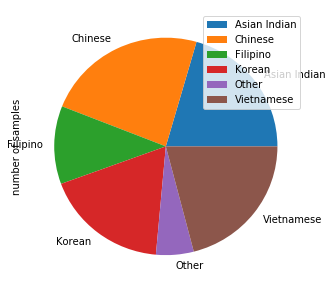

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
#pie chart
plot = x.plot.pie(y="number of samples", labels=['Asian Indian','Chinese','Filipino','Korean','Other','Vietnamese'], figsize=(5,5))
plot



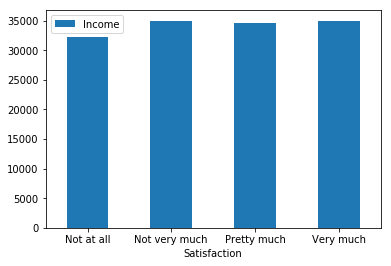

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
#bar chart
plot = y.plot.bar(x="Satisfaction" , y='Income', rot=0)
plot

